<a href="https://colab.research.google.com/github/Keruthika-N/Milestone-1/blob/main/cnn_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

# 🔹 Mount Google Drive
drive.mount('/content/drive')

# 🔹 Search for output.zip in MyDrive
zip_path = None
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    if "output.zip" in files:
        zip_path = os.path.join(root, "output.zip")
        break

if zip_path:
    print(f"✅ Found output.zip at: {zip_path}")
else:
    print("❌ output.zip not found. Make sure it's uploaded to Google Drive.")


Mounted at /content/drive
✅ Found output.zip at: /content/drive/MyDrive/output.zip


In [11]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/output.zip"   # path of your dataset
extract_path = "/content/dataset"                # where to extract

# unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped to:", extract_path)


✅ Dataset unzipped to: /content/dataset


In [ ]:
import os

train_dir = "/content/dataset"

classes = sorted(os.listdir(train_dir))
print("Classes detected:", classes)


Classes detected: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)


Found 20000 images belonging to 4 classes.
{'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}


In [13]:
print(os.listdir(extract_path))


['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']


In [14]:
for class_folder in sorted(os.listdir(extract_path)):
    class_path = os.path.join(extract_path, class_folder)
    num_files = len(os.listdir(class_path))
    print(class_folder, "->", num_files, "files")


Mild Dementia -> 5000 files
Moderate Dementia -> 5000 files
Non Demented -> 5000 files
Very mild Dementia -> 5000 files


In [15]:
!pip install split-folders
import splitfolders
input_dir = "/content/dataset"
output_dir = "/content/oasis_split_colab"

# 70% train, 15% val, 15% test
splitfolders.ratio(input_dir, output=output_dir, seed=42, ratio=(0.7, 0.15, 0.15))

print("✅ Splitting done! Folder structure created at:", output_dir)
print("Subfolders:", os.listdir(output_dir))


Copying files: 20000 files [00:02, 7626.41 files/s]

✅ Splitting done! Folder structure created at: /content/oasis_split_colab
Subfolders: ['test', 'train', 'val']


In [16]:
# 🔹 Copy the split dataset to Google Drive
!cp -r /content/oasis_split_colab /content/drive/MyDrive/

print("✅ Split dataset saved to Google Drive at:")
print("/content/drive/MyDrive/oasis_split_colab")


✅ Split dataset saved to Google Drive at:
/content/drive/MyDrive/oasis_split_colab


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 176
BATCH_SIZE = 32
work_dir = "/content/oasis_split_colab"   # after splitfolders

# Train generator
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=f"{work_dir}/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

# Validation generator
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=f"{work_dir}/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

# Test generator
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=f"{work_dir}/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 14000 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,         # small rotation (avoid large angles)
    width_shift_range=0.05,    # slight horizontal shift
    height_shift_range=0.05,   # slight vertical shift
    zoom_range=0.1,            # mild zoom
    shear_range=0.05,          # small shear
    brightness_range=[0.9, 1.1], # tiny brightness changes
    fill_mode="nearest"        # fill pixels after rotation/shift
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_gen = train_datagen.flow_from_directory(
    "/content/oasis_split_colab/train",
    target_size=(176, 176),
    batch_size=32,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    "/content/oasis_split_colab/val",
    target_size=(176, 176),
    batch_size=32,
    class_mode="categorical"
)

test_gen = test_datagen.flow_from_directory(
    "/content/oasis_split_colab/test",
    target_size=(176, 176),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 14000 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.


In [ ]:
# 2. Create ImageDataGenerators
# -------------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "/content/oasis_split_colab/train",
    target_size=(176, 176),
    batch_size=32,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    "/content/oasis_split_colab/val",
    target_size=(176, 176),
    batch_size=32,
    class_mode="categorical"
)



Found 14000 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras

IMG_SIZE = 176  # example, set to your input size

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(30, activation='softmax')  # change 30 to your number of classes
])

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),

    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),

    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.7),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy(name='acc'),
             keras.metrics.AUC(name='auc')]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 174, 174, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 87, 87, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 86, 86, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 43, 43, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 43, 43, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 21, 21, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 21, 21, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_4              │ (None, 10, 10, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_5              │ (None, 10, 10, 256)    │        68,096 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,494,596 (13.33 MB)

 Trainable params: 3,492,292 (13.32 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
EPOCHS = 50

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)
from google.colab import drive
drive.mount('/content/drive')   # Mount your Drive

# Save model inside your Drive
model.save("/content/drive/MyDrive/cnn_model.h5")   # HDF5 format
# OR
#model.save("/content/drive/MyDrive/cnn_model")      # SavedModel format



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 187s 371ms/step - acc: 0.4023 - auc: 0.6742 - loss: 1.4719 - val_acc: 0.2500 - val_auc: 0.5926 - val_loss: 1.3893
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 139s 317ms/step - acc: 0.5913 - auc: 0.8567 - loss: 0.8904 - val_acc: 0.6957 - val_auc: 0.9136 - val_loss: 0.6920
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 137s 313ms/step - acc: 0.6494 - auc: 0.8875 - loss: 0.7979 - val_acc: 0.4730 - val_auc: 0.8000 - val_loss: 1.7792
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 138s 315ms/step - acc: 0.6938 - auc: 0.9097 - loss: 0.7166 - val_acc: 0.7500 - val_auc: 0.9386 - val_loss: 0.5881
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 137s 312ms/step - acc: 0.7237 - auc: 0.9270 - loss: 0.6437 - val_acc: 0.7183 - val_auc: 0.9289 - val_loss: 0.6304
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 134s 306ms/step - acc: 0.7542 - auc: 0.9366 - loss: 0.6017 - val_acc: 0.7593 - val_auc: 0.9493 - val_loss: 0.5554
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 135s 308ms/step - acc: 0.7773 - auc:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Final epoch accuracies
train_acc = history.history['acc'][-1]
val_acc = history.history['val_acc'][-1]

print(f"Final Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")


Final Training Accuracy: 95.99%
Final Validation Accuracy: 96.83%


In [1]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Map indices back to class names
class_indices = test_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

IMG_SIZE = 176

def predict_single_image():
    # 🔹 Upload image
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    # 🔹 Preprocess image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 🔹 Prediction
    preds = model.predict(img_array)[0]
    top3_indices = preds.argsort()[-3:][::-1]
    top3_classes = [(idx_to_class[i], preds[i]) for i in top3_indices]

    # 🔹 Show image + results
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title("Uploaded Image")
    plt.show()

    print(f"\n📌 Predictions for {img_path}:")
    for rank, (cls, prob) in enumerate(top3_classes, 1):
        print(f"  Top-{rank}: {cls} ({prob:.4f})")

# 🔹 Run function
predict_single_image()


NameError: name 'test_gen' is not defined

In [4]:
import numpy as np
import os
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1️⃣ Upload multiple images
uploaded = files.upload()  # select multiple images

# 2️⃣ Load your trained model
model = load_model("/content/cnn_model.h5")  # change path if needed

# 3️⃣ Define class labels (should match your training)
class_labels = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# 4️⃣ Process images and predict
IMG_SIZE = 176  # same as your training

pred_counts = {label: 0 for label in class_labels}  # to store counts

for fname in uploaded.keys():
    # Load image
    img_path = fname
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    pred = model.predict(img_array)
    class_idx = np.argmax(pred, axis=1)[0]
    class_name = class_labels[class_idx]

    # Update count
    pred_counts[class_name] += 1

# 5️⃣ Print results
print(f"Total images selected: {len(uploaded)}")
print("Predicted class counts:")
for cls, count in pred_counts.items():
    print(f"{cls} -> {count} images")


Saving aug_00c5a440d751415780bc589ef316cc54.jpg to aug_00c5a440d751415780bc589ef316cc54.jpg
Saving aug_00cce2f9dce245dd834502f41d4f1b78.jpg to aug_00cce2f9dce245dd834502f41d4f1b78.jpg
Saving aug_00cd3fb2e0b94a02bbda20cc30340c5e.jpg to aug_00cd3fb2e0b94a02bbda20cc30340c5e.jpg
Saving aug_00ce40587de54fb089ab22c9a2395129.jpg to aug_00ce40587de54fb089ab22c9a2395129.jpg
Saving aug_00dbb72bc1334f10851b120d086fead5.jpg to aug_00dbb72bc1334f10851b120d086fead5.jpg


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

# 1️⃣ Upload multiple MRI images
uploaded = files.upload()  # select multiple images

# 2️⃣ Load your trained model
model = load_model("/content/drive/MyDrive/cnn_model.h5")  # change path if needed

# 3️⃣ Define class labels (must match your training)
class_labels = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# 4️⃣ Preprocessing function
IMG_SIZE = 176  # same as your training

def preprocess_mri(img_path):
    """Load, resize, and scale an MRI image."""
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0  # scale pixels like training
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    return img_array

# 5️⃣ Predict classes
pred_counts = {label: 0 for label in class_labels}  # initialize counts

for fname in uploaded.keys():
    img_array = preprocess_mri(fname)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred, axis=1)[0]
    class_name = class_labels[class_idx]
    pred_counts[class_name] += 1

# 6️⃣ Display results
print(f"\nTotal images selected: {len(uploaded)}")
print("Predicted class counts:")
for cls, count in pred_counts.items():
    print(f"{cls} -> {count} images")


Saving 1 (2).jpg to 1 (2) (1).jpg
Saving 1 (3).jpg to 1 (3) (1).jpg
Saving 1 (4).jpg to 1 (4) (1).jpg
Saving 1 (5).jpg to 1 (5) (1).jpg
Saving 1 (6).jpg to 1 (6) (1).jpg
Saving 1 (7).jpg to 1 (7) (1).jpg
Saving 1 (8).jpg to 1 (8) (1).jpg
Saving 1 (9).jpg to 1 (9) (1).jpg
Saving 1 (10).jpg to 1 (10) (1).jpg
Saving 1 (11).jpg to 1 (11) (1).jpg
Saving 1 (12).jpg to 1 (12) (1).jpg
Saving 1 (13).jpg to 1 (13) (1).jpg
Saving 1 (14).jpg to 1 (14) (1).jpg
Saving 1 (15).jpg to 1 (15) (1).jpg
Saving 1 (16).jpg to 1 (16) (1).jpg
Saving 1 (17).jpg to 1 (17) (1).jpg
Saving 1 (18).jpg to 1 (18) (1).jpg
Saving 1 (19).jpg to 1 (19) (1).jpg
Saving 1 (20).jpg to 1 (20) (1).jpg
Saving 1 (21).jpg to 1 (21) (1).jpg
Saving 1 (22).jpg to 1 (22) (1).jpg
Saving 1 (23).jpg to 1 (23) (1).jpg
Saving 1 (24).jpg to 1 (24) (1).jpg
Saving 1 (25).jpg to 1 (25) (1).jpg
Saving 1 (26).jpg to 1 (26) (1).jpg
Saving 1 (27).jpg to 1 (27) (1).jpg
Saving 1 (28).jpg to 1 (28) (1).jpg
Saving 1.jpg to 1 (1).jpg
Saving 2 (2).jpg t

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

# 1️⃣ Upload multiple MRI images
uploaded = files.upload()  # select multiple images

# 2️⃣ Load your trained model
model = load_model("/content/cnn_model.h5")  # change path if needed

# 3️⃣ Define class labels (must match your training)
class_labels = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# 4️⃣ Preprocessing function with z-score normalization
IMG_SIZE = 176  # same as your training

def preprocess_mri(img_path):
    """Load, resize, scale, and normalize an MRI image."""
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)

    # Scale to [0,1]
    img_array = img_array / 255.0

    # Z-score normalization per image
    img_array = (img_array - np.mean(img_array)) / (np.std(img_array) + 1e-7)

    # Add batch dimension
    return np.expand_dims(img_array, axis=0)

# 5️⃣ Predict classes
pred_counts = {label: 0 for label in class_labels}  # initialize counts

for fname in uploaded.keys():
    img_array = preprocess_mri(fname)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred, axis=1)[0]
    class_name = class_labels[class_idx]
    pred_counts[class_name] += 1

# 6️⃣ Display results
print(f"\nTotal images selected: {len(uploaded)}")
print("Predicted class counts:")
for cls, count in pred_counts.items():
    print(f"{cls} -> {count} images")


Saving 1 (2).jpg to 1 (2) (2).jpg
Saving 1 (3).jpg to 1 (3) (2).jpg
Saving 1 (4).jpg to 1 (4) (2).jpg
Saving 1 (5).jpg to 1 (5) (2).jpg
Saving 1 (6).jpg to 1 (6) (2).jpg
Saving 1 (7).jpg to 1 (7) (2).jpg
Saving 1 (8).jpg to 1 (8) (2).jpg
Saving 1 (9).jpg to 1 (9) (2).jpg
Saving 1 (10).jpg to 1 (10) (2).jpg
Saving 1 (11).jpg to 1 (11) (2).jpg
Saving 1 (12).jpg to 1 (12) (2).jpg
Saving 1 (13).jpg to 1 (13) (2).jpg
Saving 1 (14).jpg to 1 (14) (2).jpg
Saving 1 (15).jpg to 1 (15) (2).jpg
Saving 1 (16).jpg to 1 (16) (2).jpg
Saving 1 (17).jpg to 1 (17) (2).jpg
Saving 1 (18).jpg to 1 (18) (2).jpg
Saving 1 (19).jpg to 1 (19) (2).jpg
Saving 1 (20).jpg to 1 (20) (2).jpg
Saving 1 (21).jpg to 1 (21) (2).jpg
Saving 1 (22).jpg to 1 (22) (2).jpg
Saving 1 (23).jpg to 1 (23) (2).jpg
Saving 1 (24).jpg to 1 (24) (2).jpg
Saving 1 (25).jpg to 1 (25) (2).jpg
Saving 1 (26).jpg to 1 (26) (2).jpg
Saving 1 (27).jpg to 1 (27) (2).jpg
Saving 1 (28).jpg to 1 (28) (2).jpg
Saving 1 (29).jpg to 1 (29).jpg
Saving 1 (30

Copying files: 9101 files [2:33:42,  1.01s/ files]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━

Model: "functional_263"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 176, 176, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 174, 174, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 87, 87, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 86, 86, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_6              │ (None, 43, 43, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_7              │ (None, 43, 43, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_8              │ (None, 21, 21, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_9              │ (None, 21, 21, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_10             │ (None, 10, 10, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_11             │ (None, 10, 10, 256)    │        68,096 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,494,596 (13.33 MB)

 Trainable params: 3,492,292 (13.32 MB)

 Non-trainable params: 2,304 (9.00 KB)

Saving 1 (2).jpg to 1 (2) (5).jpg
Saving 1 (3).jpg to 1 (3) (5).jpg
Saving 1 (4).jpg to 1 (4) (5).jpg
Saving 1 (5).jpg to 1 (5) (5).jpg
Saving 1 (6).jpg to 1 (6) (5).jpg
Saving OAS1_0001_MR1_mpr-1_100.jpg to OAS1_0001_MR1_mpr-1_100 (2).jpg
Saving OAS1_0001_MR1_mpr-1_131.jpg to OAS1_0001_MR1_mpr-1_131 (2).jpg
Saving OAS1_0001_MR1_mpr-1_135.jpg to OAS1_0001_MR1_mpr-1_135 (2).jpg
Saving OAS1_0001_MR1_mpr-1_146.jpg to OAS1_0001_MR1_mpr-1_146 (2).jpg
Saving OAS1_0001_MR1_mpr-2_113.jpg to OAS1_0001_MR1_mpr-2_113 (2).jpg
Using last conv layer for Grad-CAM: separable_conv2d_11


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_3955']]
Received: inputs=Tensor(shape=(1, 176, 176, 3))
  warnings.warn(msg)


1 (2) (5).jpg -> Predicted class: Moderate Dementia


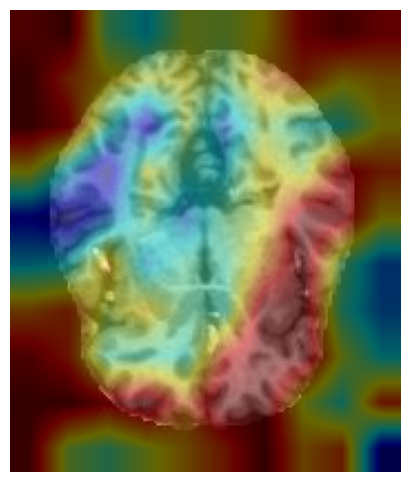

1 (3) (5).jpg -> Predicted class: Moderate Dementia


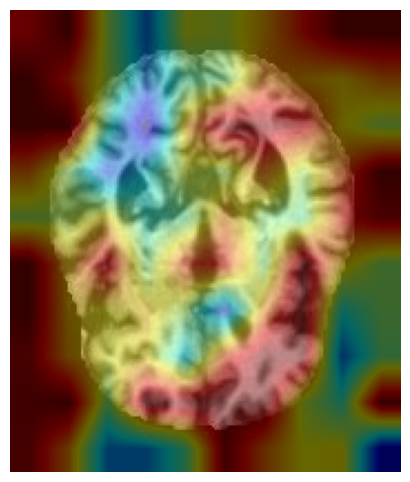

1 (4) (5).jpg -> Predicted class: Moderate Dementia


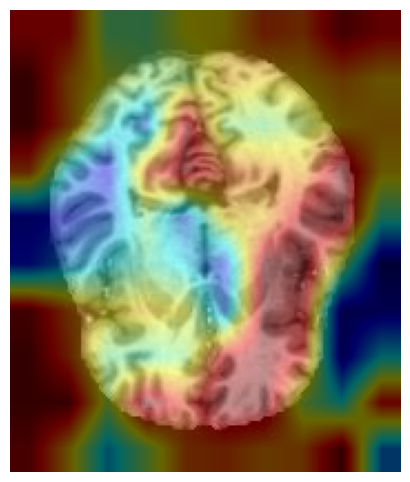

1 (5) (5).jpg -> Predicted class: Moderate Dementia


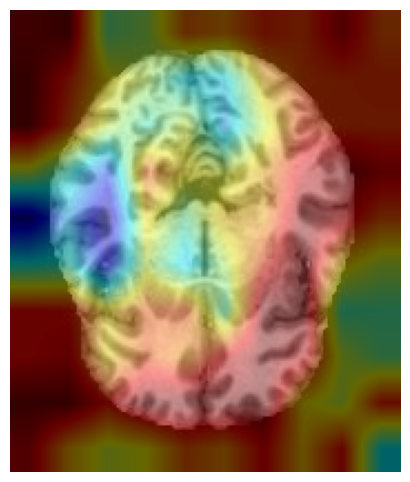

1 (6) (5).jpg -> Predicted class: Moderate Dementia


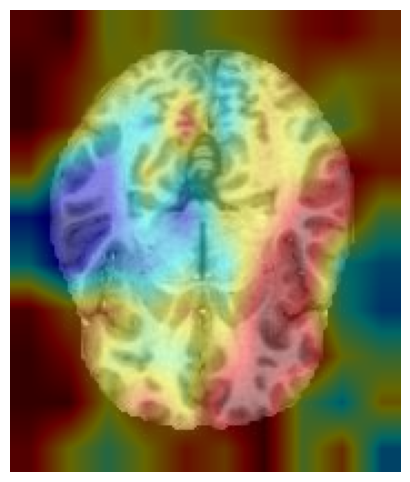

OAS1_0001_MR1_mpr-1_100 (2).jpg -> Predicted class: Mild Dementia


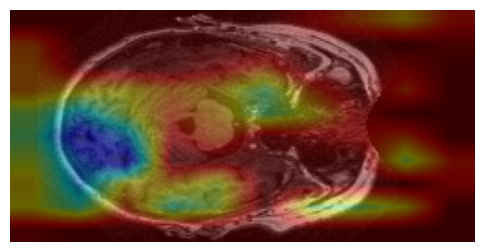

OAS1_0001_MR1_mpr-1_131 (2).jpg -> Predicted class: Mild Dementia


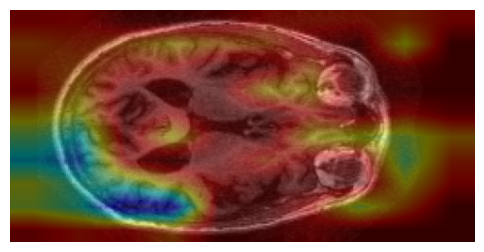

OAS1_0001_MR1_mpr-1_135 (2).jpg -> Predicted class: Mild Dementia


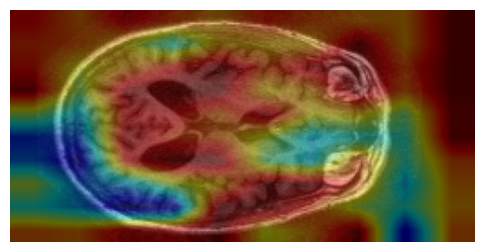

OAS1_0001_MR1_mpr-1_146 (2).jpg -> Predicted class: Mild Dementia


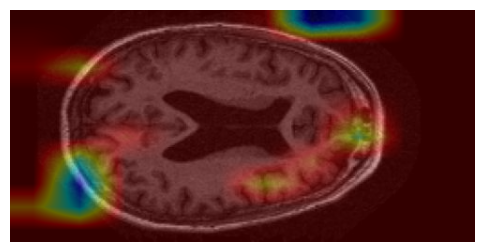

OAS1_0001_MR1_mpr-2_113 (2).jpg -> Predicted class: Moderate Dementia


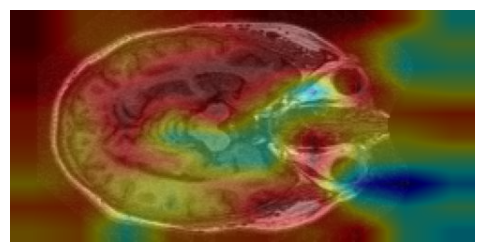

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from google.colab import files
import tensorflow as tf
import cv2

# ===============================
# 1️⃣ Build Functional CNN model
# ===============================
IMG_SIZE = 176
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = layers.Conv2D(16, (3,3), activation='relu')(inputs)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(32, (2,2), activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.SeparableConv2D(64, 3, activation='relu', padding='same')(x)
x = layers.SeparableConv2D(64, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D()(x)

x = layers.SeparableConv2D(128, 3, activation='relu', padding='same')(x)
x = layers.SeparableConv2D(128, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.SeparableConv2D(256, 3, activation='relu', padding='same')(x)
x = layers.SeparableConv2D(256, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.7)(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(4, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===============================
# 2️⃣ Load trained weights
# ===============================
model.load_weights("/content/cnn_model.h5")  # adjust path

# ===============================
# 3️⃣ Upload MRI images
# ===============================
uploaded = files.upload()
class_labels = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# ===============================
# 4️⃣ Preprocess images
# ===============================
def preprocess_mri(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = (img_array - np.mean(img_array)) / (np.std(img_array)+1e-7)
    return np.expand_dims(img_array, axis=0)

# ===============================
# 5️⃣ Grad-CAM function
# ===============================
def grad_cam(model, img_array, last_conv_layer_name):
    grad_model = Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap)+1e-7)
    return heatmap.numpy(), class_idx

# ===============================
# 6️⃣ Display Grad-CAM
# ===============================
def show_gradcam(img_path, heatmap):
    img = image.load_img(img_path)
    img = image.img_to_array(img)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img.astype('uint8'), 0.6, heatmap_color, 0.4, 0)
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype('uint8'))
    plt.axis('off')
    plt.show()

# ===============================
# 7️⃣ Detect last conv layer automatically
# ===============================
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, (layers.Conv2D, layers.SeparableConv2D)):
        last_conv_layer_name = layer.name
        break
print("Using last conv layer for Grad-CAM:", last_conv_layer_name)

# ===============================
# 8️⃣ Run Grad-CAM on uploaded images
# ===============================
for fname in uploaded.keys():
    img_array = preprocess_mri(fname)
    heatmap, class_idx = grad_cam(model, img_array, last_conv_layer_name)
    print(f"{fname} -> Predicted class: {class_labels[class_idx]}")
    show_gradcam(fname, heatmap)


In [ ]:
# After training
model.save("cnn_model.h5")

# Later, reload
from tensorflow.keras.models import load_model
model = load_model("cnn_model.h5")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save("/content/drive/MyDrive/cnn_model.h5")


In [5]:
from tensorflow.keras.models import load_model
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

# Load the saved model
model = load_model("/content/drive/MyDrive/cnn_model.h5")


Mounted at /content/drive


In [17]:
# 🔹 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import zipfile
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np

# 🔹 2️⃣ Paths
zip_path = "/content/drive/MyDrive/output.zip"         # Your dataset zip
split_drive_path = "/content/drive/MyDrive/oasis_split_colab"  # Saved split dataset
work_dir = "/content/oasis_split_colab"
IMG_SIZE = 176
BATCH_SIZE = 32

# 🔹 3️⃣ Ensure split dataset exists
if not os.path.exists(work_dir):
    if os.path.exists(split_drive_path):
        print("📂 Copying split dataset from Drive...")
        !cp -r "{split_drive_path}" /content/
    else:
        print("📦 Splitting dataset from zip...")
        # Unzip dataset
        extract_path = "/content/dataset"
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        # Split folders
        splitfolders.ratio(extract_path, output=work_dir, seed=42, ratio=(0.7,0.15,0.15))
        # Save split dataset to Drive for future sessions
        !cp -r "{work_dir}" "{split_drive_path}"
    print("✅ Dataset ready!")
else:
    print("✅ Dataset already exists in Colab session.")

# 🔹 4️⃣ Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    directory=f"{work_dir}/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# 🔹 5️⃣ Load saved model from Drive
model_path = "/content/drive/MyDrive/cnn_model.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# 🔹 6️⃣ Evaluate on test set
test_loss, test_acc, test_auc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test AUC: {test_auc:.2f}")

# 🔹 7️⃣ Function to predict top-3 classes for any image
def predict_top3(image_path, model, class_indices, img_size=IMG_SIZE):
    img = load_img(image_path, target_size=(img_size, img_size))
    x = img_to_array(img)/255.0
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)[0]
    top3_idx = preds.argsort()[-3:][::-1]
    inv_class_indices = {v:k for k,v in class_indices.items()}

    print(f"Top-3 predictions for {os.path.basename(image_path)}:")
    for i in top3_idx:
        print(f"  {inv_class_indices[i]} -> {preds[i]*100:.2f}%")

    return preds[top3_idx]

# 🔹 8️⃣ Example usage
class_indices = test_gen.class_indices
# Replace with your image path
sample_image = "/content/oasis_split_colab/test/Non Demented/sample1.jpg"
predict_top3(sample_image, model, class_indices)


Mounted at /content/drive
Found 3000 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


✅ Model loaded successfully!
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - acc: 0.9849 - auc: 0.9995 - loss: 0.0379
Test Accuracy: 97.37%
Test AUC: 1.00


FileNotFoundError: [Errno 2] No such file or directory: '/content/oasis_split_colab/test/Non Demented/sample1.jpg'

In [23]:
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np
import os

def predict_top3(image_path, model, class_indices, img_size=176):
    """
    Predict top-3 classes for a single image.

    Args:
        image_path (str): Path to the image.
        model: Loaded Keras model.
        class_indices (dict): Mapping of class names to indices.
        img_size (int): Input image size (height=width).
    """
    if not os.path.exists(image_path):
        print(f"❌ File not found: {image_path}")
        return

    # Load and preprocess image
    img = load_img(image_path, target_size=(img_size, img_size))
    x = img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    # Predict
    preds = model.predict(x)[0]

    # Top 3 predictions
    top3_idx = preds.argsort()[-3:][::-1]
    inv_class_indices = {v: k for k, v in class_indices.items()}

    print(f"Top-3 predictions for {os.path.basename(image_path)}:")
    for i in top3_idx:
        print(f"  {inv_class_indices[i]} -> {preds[i]*100:.2f}%")

    return preds[top3_idx]

# Example usage:
class_indices = test_gen.class_indices  # Already created test generator
sample_image = "/content/drive/MyDrive/oasis_split_colab/test/Non Demented/OAS1_0063_MR1_mpr-1_108.jpg"

predict_top3(sample_image, model, class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Top-3 predictions for OAS1_0063_MR1_mpr-1_108.jpg:
  Non Demented -> 99.92%
  Very mild Dementia -> 0.08%
  Mild Dementia -> 0.00%


array([9.9919480e-01, 8.0132461e-04, 3.7798684e-06], dtype=float32)

In [19]:
import os

test_folder = "/content/drive/MyDrive/oasis_split_colab/test/Non Demented"
print(os.listdir(test_folder))


['OAS1_0259_MR1_mpr-4_114.jpg', 'OAS1_0083_MR1_mpr-3_128.jpg', 'OAS1_0156_MR2_mpr-1_160.jpg', 'OAS1_0063_MR1_mpr-1_108.jpg', 'OAS1_0353_MR2_mpr-2_132.jpg', 'OAS1_0101_MR1_mpr-3_156.jpg', 'OAS1_0101_MR2_mpr-3_145.jpg', 'OAS1_0043_MR1_mpr-2_108.jpg', 'OAS1_0057_MR1_mpr-2_123.jpg', 'OAS1_0313_MR1_mpr-3_101.jpg', 'OAS1_0249_MR2_mpr-3_141.jpg', 'OAS1_0050_MR1_mpr-4_113.jpg', 'OAS1_0080_MR2_mpr-1_145.jpg', 'OAS1_0301_MR1_mpr-4_155.jpg', 'OAS1_0159_MR1_mpr-1_155.jpg', 'OAS1_0040_MR1_mpr-2_140.jpg', 'OAS1_0116_MR1_mpr-1_154.jpg', 'OAS1_0213_MR1_mpr-1_149.jpg', 'OAS1_0279_MR1_mpr-1_126.jpg', 'OAS1_0302_MR1_mpr-2_131.jpg', 'OAS1_0295_MR1_mpr-3_125.jpg', 'OAS1_0182_MR1_mpr-2_124.jpg', 'OAS1_0009_MR1_mpr-2_127.jpg', 'OAS1_0075_MR1_mpr-2_119.jpg', 'OAS1_0313_MR1_mpr-1_128.jpg', 'OAS1_0367_MR1_mpr-2_113.jpg', 'OAS1_0188_MR1_mpr-1_127.jpg', 'OAS1_0043_MR1_mpr-3_119.jpg', 'OAS1_0033_MR1_mpr-3_141.jpg', 'OAS1_0176_MR1_mpr-2_109.jpg', 'OAS1_0088_MR1_mpr-4_104.jpg', 'OAS1_0010_MR1_mpr-1_138.jpg', 'OAS1_0